In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


train_data_dir = '/content/drive/My Drive/KDI_material_classification/Dataset/Train set'
validation_data_dir = '/content/drive/My Drive/KDI_material_classification/Dataset/Validation set'


num_classes = 3
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)
batch_size = 4
epochs = 10

# Data Augmentation for training data
train_data_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# No augmentation for validation data
validation_data_generator = ImageDataGenerator(rescale=1.0 / 255)

# Load and prepare data
train_generator = train_data_generator.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)


model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))


model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.summary()

Found 194 images belonging to 3 classes.
Found 60 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                         

In [ ]:

# Train the model
model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

# Save the trained model
model.save('object_prediction_model.h5')

Epoch 1/10
48/48 [==============================] - 69s 1s/step - loss: 1.2766 - accuracy: 0.4158 - val_loss: 0.9156 - val_accuracy: 0.7000
Epoch 2/10
48/48 [==============================] - 16s 328ms/step - loss: 0.4419 - accuracy: 0.8579 - val_loss: 0.0553 - val_accuracy: 1.0000
Epoch 3/10
48/48 [==============================] - 15s 321ms/step - loss: 0.1211 - accuracy: 0.9684 - val_loss: 0.1542 - val_accuracy: 1.0000
Epoch 4/10
48/48 [==============================] - 16s 330ms/step - loss: 0.0383 - accuracy: 1.0000 - val_loss: 0.0064 - val_accuracy: 1.0000
Epoch 5/10
48/48 [==============================] - 16s 331ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0052 - val_accuracy: 1.0000
Epoch 6/10
48/48 [==============================] - 16s 325ms/step - loss: 5.4616e-04 - accuracy: 1.0000 - val_loss: 0.0069 - val_accuracy: 1.0000
Epoch 7/10
48/48 [==============================] - 17s 345ms/step - loss: 3.1670e-04 - accuracy: 1.0000 - val_loss: 0.0044 - val_accuracy: 1

1/1 [==============================] - 1s 805ms/step
Predictions: [[0.0058747  0.6417176  0.35240775]]
Class Labels: {'Battery holder': 0, 'DC motor': 1, 'Geared motor': 2}


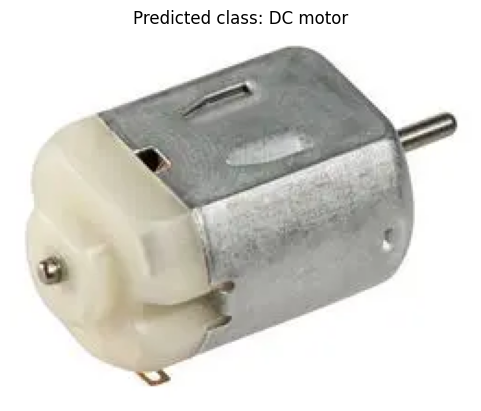

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the trained model
model = tf.keras.models.load_model('object_prediction_model.h5')

image_path = '/content/drive/My Drive/tester/image.png'

#load and preprocess the image
img = image.load_img(image_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = x / 255.0

#make the prediction
predictions = model.predict(x)

#class labels
class_labels = train_generator.class_indices

print("Predictions:", predictions)
print("Class Labels:", class_labels)

# Convert the prediction to class labels
predicted_class = list(class_labels.keys())[np.argmax(predictions[0])]

#print("Predicted class:", predicted_class)
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
plt.imshow(img)
plt.title(f"Predicted class: {predicted_class}")
plt.axis('off')
plt.show()